In [11]:
from ollama import chat
import re

age = 30
gender = 'Female'

pre_prompt = 'Here is the journal entry of a ' + str(age) + ' year old ' + str(gender) + ':' 
post_prompt = """ analyse the sentiments in this entry and give me a sentiment (positive, mostly positive, mostly negative and negative) that matches the most. Then based on the entry suggest 2 self care suggestions that could be any activity can helps make their mood better. You should be polite and sensitive while doing this. 
    I want your response to be in the following format
    Sentiment:<positive, mostly positive, mostly negative, negative>
    Suggestions:<suggestions separated by comma>
    <NOTHING AFTER THIS>
    """

journal_entry = 'I am not feeling very good today, It seems I won\'t get a job, and with the loan over my head it seems everything is coming to an depressing end'

content = pre_prompt + journal_entry + post_prompt

response = chat(model='deepseek-r1:1.5b', messages=[
    {
        'role': 'user',
        'content': content,
    }
])

stripped_text = re.sub(r"<think>.*?</think>", "", response.message.content, flags=re.DOTALL).strip()
stripped_text = stripped_text.replace("Sentiment:", "")
stripped_text = stripped_text.replace("Suggestions:", "")
stripped_text = stripped_text.replace("-", "")
stripped_text = stripped_text.replace("-", "")

result = [res.strip() for res in stripped_text.split("\n")]
print(result)


['mostly negative', 'journaling about your thoughts and feelings; take a break from social media to avoid distractions']


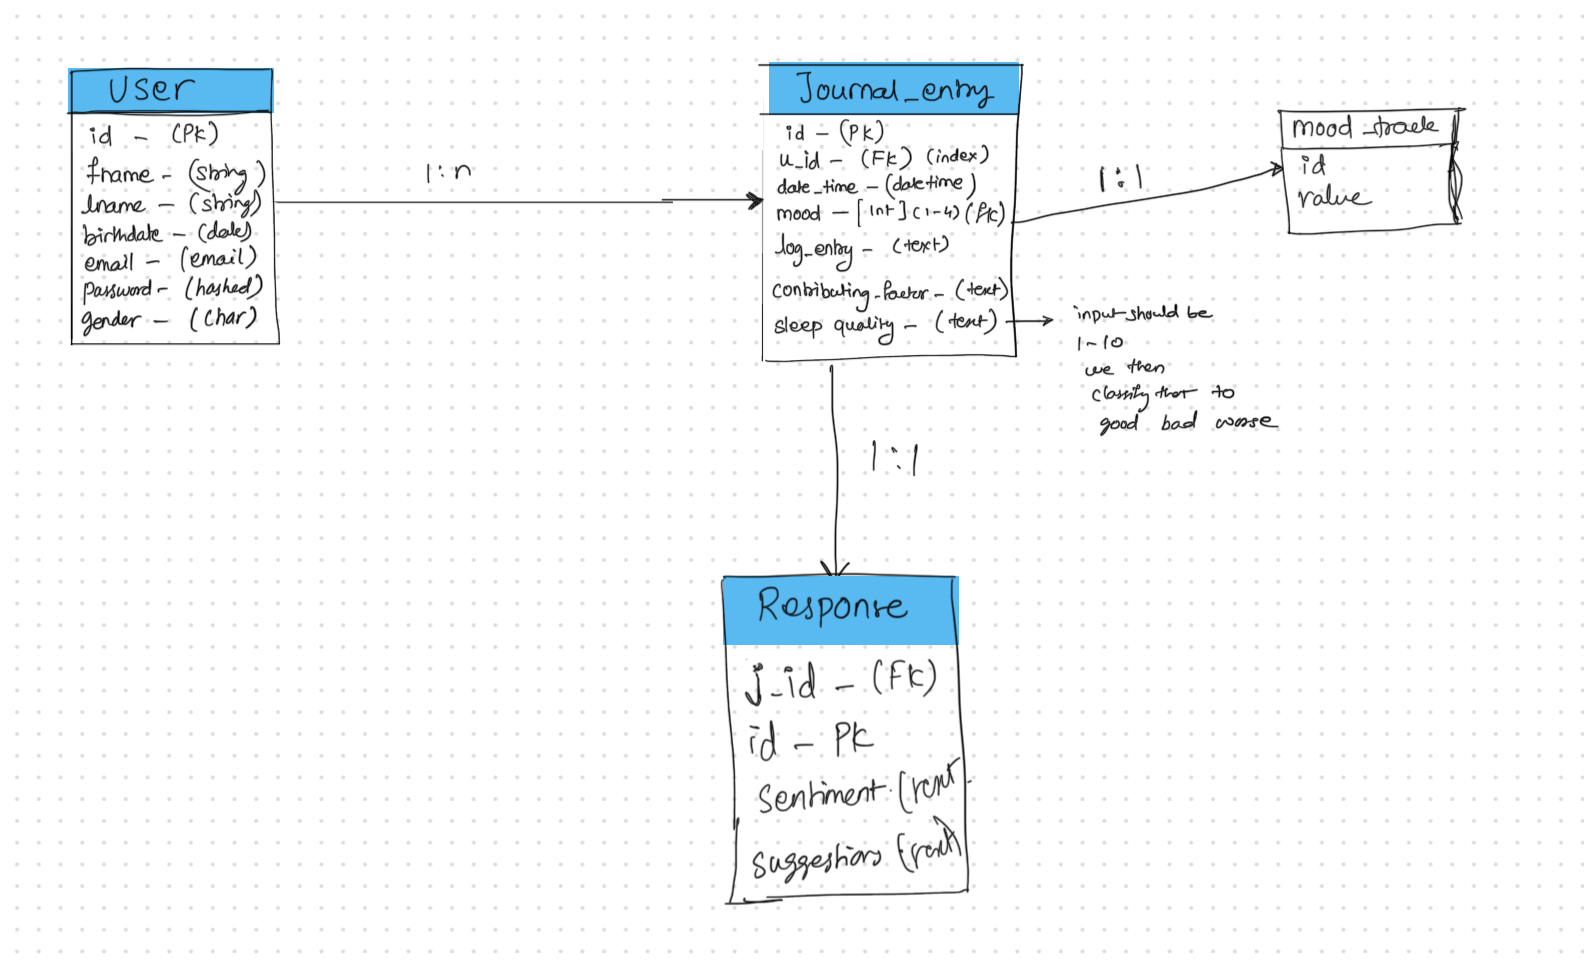

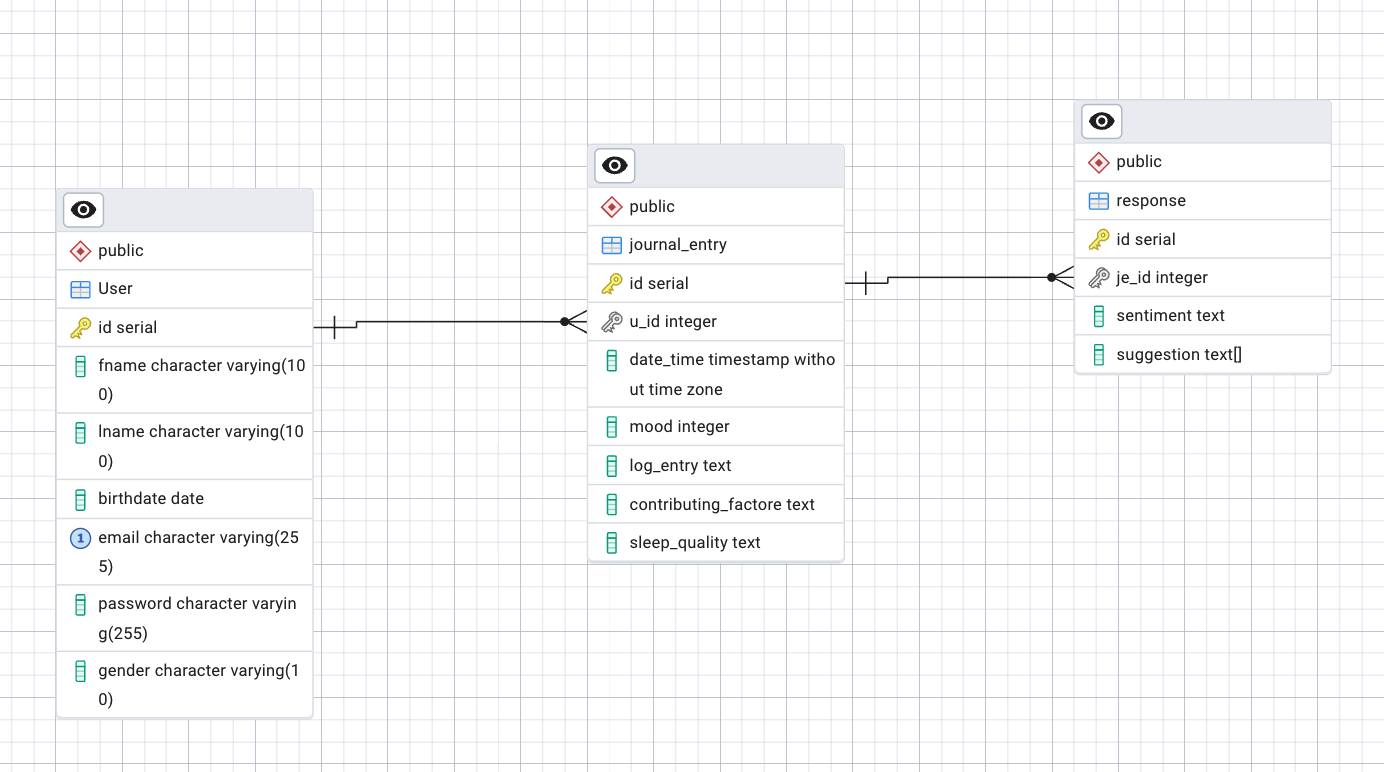